<a href="https://colab.research.google.com/github/AlejoSasto/Aprende_Web/blob/main/Practica_1_seminario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema con base a los datos de estudio
En Colombia, el sector agropecuario representa el 6.9% del PIB nacional y abarca aproximadamente 43 millones de hectáreas cultivables. Esta actividad es el sustento directo o indirecto de cientos de miles de personas y está influenciada por múltiples factores no controlables, como el clima, la infraestructura de transporte y las condiciones del suelo.
Dada su importancia, es fundamental identificar los factores que afectan o potencian el rendimiento (t/ha) de los distintos cultivos. Para ello, se dispone de una base de datos con información detallada sobre la evolución de la producción agrícola en Colombia entre 2006 y 2018, lo que permite analizar las características y ventajas de cada departamento productor.

# Objetivo del análisis

El propósito de este análisis es identificar a profundidad el desempeño de la producción agrícola a nivel nacional y regional para cada tipo de cultivo con el fin de identificar patrones de crecimiento, eficiencia en el uso de las tierras, factores que influyan en la varibilidad de la producción y oportunidades de mayor producción en departamentos con condiciones climáticas similares que tengan niveles de producción bajos frente a otros en los grupos de cultivo más representativos.



In [ ]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Montar Google Drive si se usa en Google Colab
from google.colab import drive
drive.mount('/content/drive')

# Definir la ruta base donde está el archivo CSV
ruta_base = "/content/drive/My Drive/Colab Notebooks/"
ruta_csv = ruta_base + "Evaluaciones_Agropecuarias_Municipales_EVA_20250215.csv"

# Cargar dataset con encoding adecuado
df = pd.read_csv(ruta_csv, delimiter=",", encoding="latin1")

# Renombrar columnas para facilitar su uso
df.columns = [
    "Codigo_Departamento", "Departamento", "Codigo_Municipio", "Municipio",
    "Grupo_Cultivo", "Subgrupo_Cultivo", "Cultivo", "Desagregacion_Regional",
    "Año", "Periodo", "Area_Sembrada_ha", "Area_Cosechada_ha", "Produccion_t",
    "Rendimiento_t_ha", "Estado_Fisico", "Nombre_Cientifico", "Ciclo_Cultivo"
]

print("Columnas del DataFrame:", df.columns)


# Verificar si hay valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Columnas del DataFrame: Index(['Codigo_Departamento', 'Departamento', 'Codigo_Municipio', 'Municipio',
       'Grupo_Cultivo', 'Subgrupo_Cultivo', 'Cultivo',
       'Desagregacion_Regional', 'Año', 'Periodo', 'Area_Sembrada_ha',
       'Area_Cosechada_ha', 'Produccion_t', 'Rendimiento_t_ha',
       'Estado_Fisico', 'Nombre_Cientifico', 'Ciclo_Cultivo'],
      dtype='object')

Valores nulos por columna:
Codigo_Departamento          0
Departamento                 0
Codigo_Municipio             0
Municipio                    1
Grupo_Cultivo                0
Subgrupo_Cultivo             0
Cultivo                      0
Desagregacion_Regional       0
Año                          0
Periodo                      0
Area_Sembrada_ha             0
Area_Cosechada_ha            0
Produccion_t                 0
Rendimiento_t_ha          3433
Estado_Fisico                0


<ipython-input-114-4fcd346d6c17>:31: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


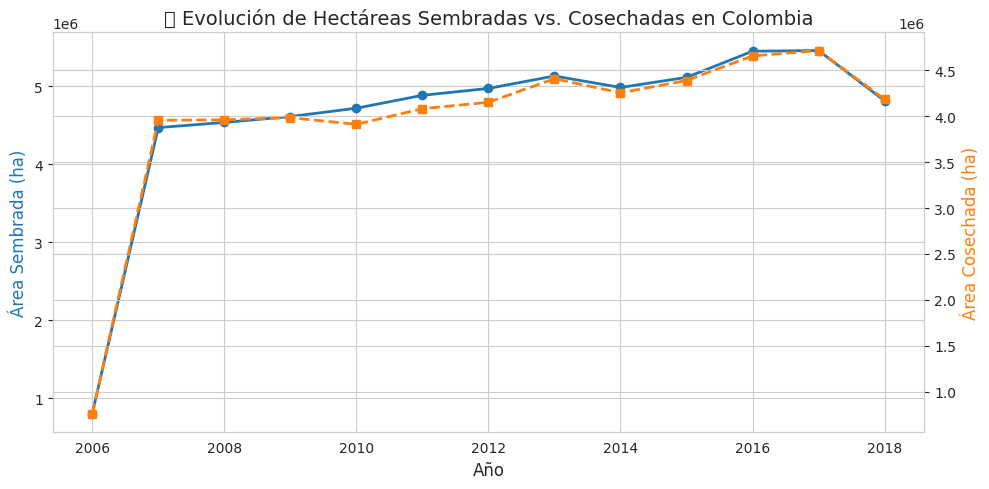

In [ ]:
# Agrupar y sumar los valores anuales
df_area_sembrada_nacional = df.groupby('Año')['Area_Sembrada_ha'].sum()
df_area_cosechada_nacional = df.groupby('Año')['Area_Cosechada_ha'].sum()
df_produccion_nacional = df.groupby('Año')['Produccion_t'].sum()

# Configurar estilo de Seaborn para mejorar visualización
sns.set_style("whitegrid")
# Definir colores
color_sembrada = "#1f77b4"  # Azul oscuro
color_cosechada = "#ff7f0e"  # Naranja oscuro

# Crear gráfico
fig, ax1 = plt.subplots(figsize=(10, 5))

# Área Sembrada
ax1.plot(df_area_sembrada_nacional.index, df_area_sembrada_nacional.values,
         color=color_sembrada, marker='o', linestyle='-', linewidth=2, label="Área Sembrada")

# Área Cosechada (segundo eje)
ax2 = ax1.twinx()
ax2.plot(df_area_cosechada_nacional.index, df_area_cosechada_nacional.values,
         color=color_cosechada, marker='s', linestyle='--', linewidth=2, label="Área Cosechada")

# Configuración de ejes
ax1.set_xlabel("Año", fontsize=12)
ax1.set_ylabel("Área Sembrada (ha)", color=color_sembrada, fontsize=12)
ax2.set_ylabel("Área Cosechada (ha)", color=color_cosechada, fontsize=12)

# Título y diseño
plt.title("📈 Evolución de Hectáreas Sembradas vs. Cosechadas en Colombia", fontsize=14)
fig.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


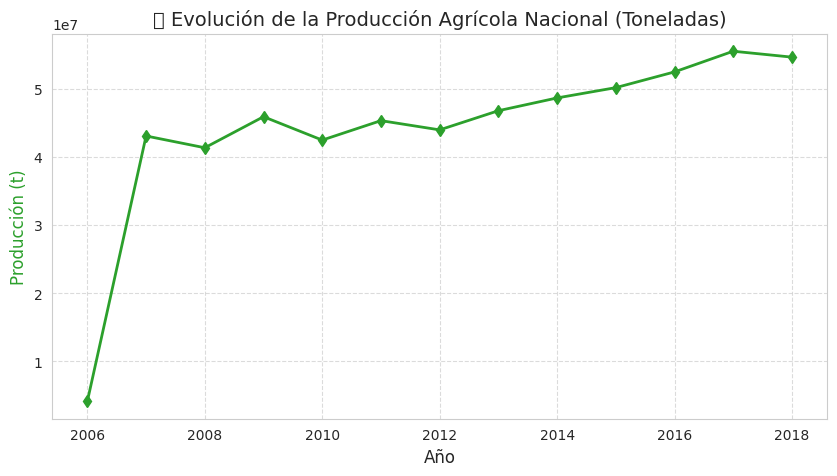

In [ ]:
# Definir color para Producción
color_produccion = "#2ca02c"  # Verde oscuro

# Crear gráfico
fig, ax3 = plt.subplots(figsize=(10, 5))

# Producción Nacional
ax3.plot(df_produccion_nacional.index, df_produccion_nacional.values,
         color=color_produccion, marker='d', linestyle='-', linewidth=2, label="Producción")

# Configuración de ejes
ax3.set_xlabel("Año", fontsize=12)
ax3.set_ylabel("Producción (t)", color=color_produccion, fontsize=12)

# Título y diseño
plt.title("🌾 Evolución de la Producción Agrícola Nacional (Toneladas)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



Departamentos únicos:
 ['BOYACA' 'CUNDINAMARCA' 'NORTE DE SANTANDER' 'SANTANDER' 'CAUCA'
 'VALLE DEL CAUCA' 'CALDAS' 'PUTUMAYO' 'TOLIMA' 'NARIÃ\x91O' 'QUINDIO'
 'ANTIOQUIA' 'CAQUETA' 'AMAZONAS' 'CHOCO' 'HUILA' 'ARAUCA' 'CASANARE'
 'LA GUAJIRA' 'BOLIVAR' 'CESAR' 'META' 'RISARALDA' 'SUCRE' 'CORDOBA'
 'VICHADA' 'MAGDALENA' 'GUAINIA' 'ATLANTICO' 'SAN ANDRES Y PROVIDENCIA'
 'GUAVIARE' 'VAUPES']

Cantidad de registros por Departamento:
 Departamento
BOYACA                      20383
ANTIOQUIA                   18165
CUNDINAMARCA                17554
HUILA                       15722
VALLE DEL CAUCA             15633
SANTANDER                   14451
NARIÃO                     13342
NORTE DE SANTANDER           9638
TOLIMA                       8546
CAUCA                        8302
CALDAS                       5273
META                         5059
CORDOBA                      4996
BOLIVAR                      4931
CESAR                        4834
SUCRE                        4374
CHOCO  

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 145 (\x91) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


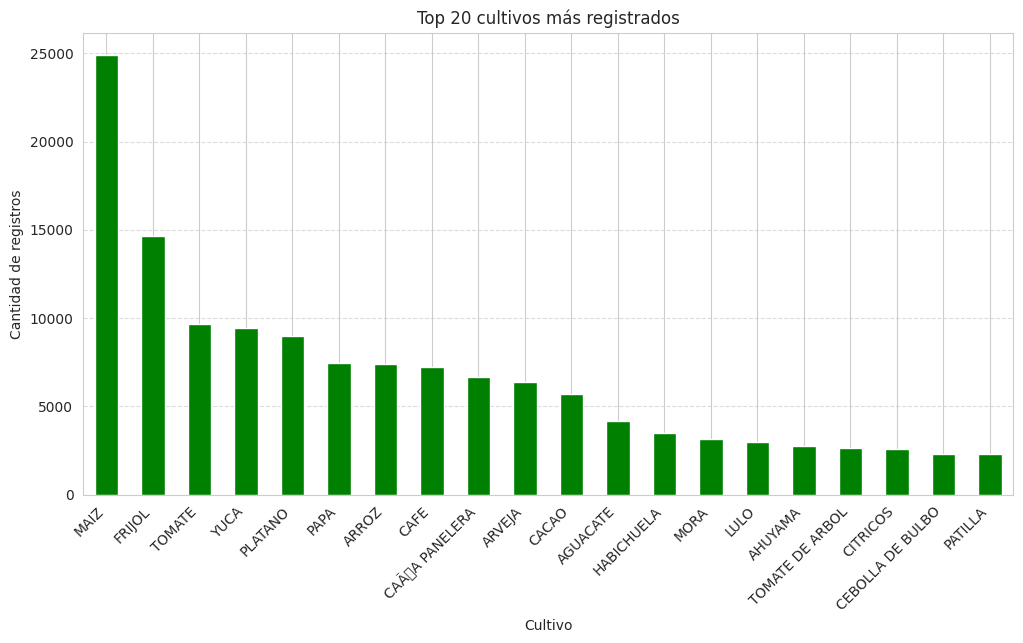

In [ ]:
# Normalizamos los textos eliminando espacios y convirtiendo a mayúsculas
df["Departamento"] = df["Departamento"].str.strip().str.upper()
df["Cultivo"] = df["Cultivo"].str.strip().str.upper()

# Eliminamos registros nulos en Departamento, Cultivo y Rendimiento_t_ha
df = df.dropna(subset=["Departamento", "Cultivo", "Rendimiento_t_ha"])

# Imprimimos valores únicos y conteos
print("\nDepartamentos únicos:\n", df["Departamento"].unique())
print("\nCantidad de registros por Departamento:\n", df["Departamento"].value_counts())

print("\nCultivos únicos:\n", df["Cultivo"].unique())
print("\nCantidad de registros por Cultivo:\n", df["Cultivo"].value_counts())

# Filtrar datos para el cultivo de MAÍZ
maiz = df[df["Cultivo"] == "MAIZ"]

# Medidas de tendencia central por departamento
tendencia_central = maiz.groupby("Departamento")["Rendimiento_t_ha"].agg(["mean", "median"])
tendencia_central["mode"] = maiz.groupby("Departamento")["Rendimiento_t_ha"].apply(lambda x: x.mode().values[0] if not x.mode().empty else None)

print("\n Medidas de tendencia central para el cultivo de MAÍZ:")
print(tendencia_central)

# Ordenamos los departamentos por cantidad de registros
df_deptos = df["Departamento"].value_counts().sort_values(ascending=True)

# Top 20 cultivos más comunes
df_cultivos = df["Cultivo"].value_counts().head(20)

# Gráfico: Top 20 cultivos más registrados
plt.figure(figsize=(12, 6))
df_cultivos.plot(kind="bar", color="green")
plt.ylabel("Cantidad de registros")
plt.xlabel("Cultivo")
plt.title("Top 20 cultivos más registrados")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Departamentos seleccionados: ['META', 'CORDOBA', 'VALLE DEL CAUCA']


<Figure size 1200x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


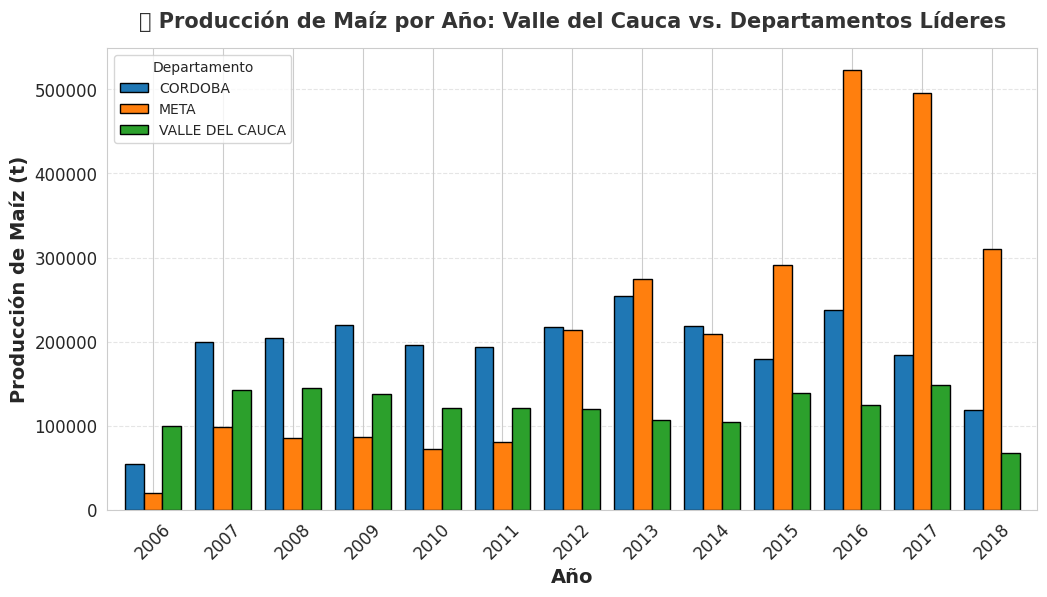

In [ ]:
df_cultivos = df["Cultivo"].value_counts().head(20)  # Top 20 cultivos más comunes
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Normalizar nombres de departamento a mayúsculas y sin espacios extra
df["Departamento"] = df["Departamento"].str.strip().str.upper()

# Filtrar solo datos de Maíz
df_maiz = df[df["Cultivo"].str.contains("MAIZ", case=False, na=False)]

# Agrupar producción por departamento
produccion_maiz_departamento = df_maiz.groupby("Departamento")["Produccion_t"].sum()

# Seleccionar los dos departamentos con mayor producción
top_departamentos = produccion_maiz_departamento.sort_values(ascending=False).head(2)

# Agregar Valle del Cauca si no está en el top 2
valle_nombre = "VALLE DEL CAUCA"
if valle_nombre not in top_departamentos.index and valle_nombre in produccion_maiz_departamento.index:
    top_departamentos[valle_nombre] = produccion_maiz_departamento[valle_nombre]

# Verificar departamentos seleccionados
departamentos_seleccionados = top_departamentos.index.tolist()
print("Departamentos seleccionados:", departamentos_seleccionados)

# Filtrar los datos solo para estos departamentos
df_filtrado = df_maiz[df_maiz["Departamento"].isin(departamentos_seleccionados)]

# Agrupar por año y departamento
produccion_por_anio = df_filtrado.groupby(["Año", "Departamento"])["Produccion_t"].sum().unstack()

# Crear figura
plt.figure(figsize=(12, 6))

# Definir colores personalizados
colores = ["#1f77b4", "#ff7f0e", "#2ca02c"]

# Graficar el histograma (barras agrupadas por año)
produccion_por_anio.plot(kind="bar", stacked=False, color=colores, edgecolor="black", width=0.8, figsize=(12, 6))

# Etiquetas y título
plt.xlabel("Año", fontsize=14, fontweight="bold")
plt.ylabel("Producción de Maíz (t)", fontsize=14, fontweight="bold")
plt.title("📊 Producción de Maíz por Año: Valle del Cauca vs. Departamentos Líderes",
          fontsize=15, fontweight="bold", pad=15, color="#333333")

# Mejoras visuales
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.legend(title="Departamento")
plt.show()


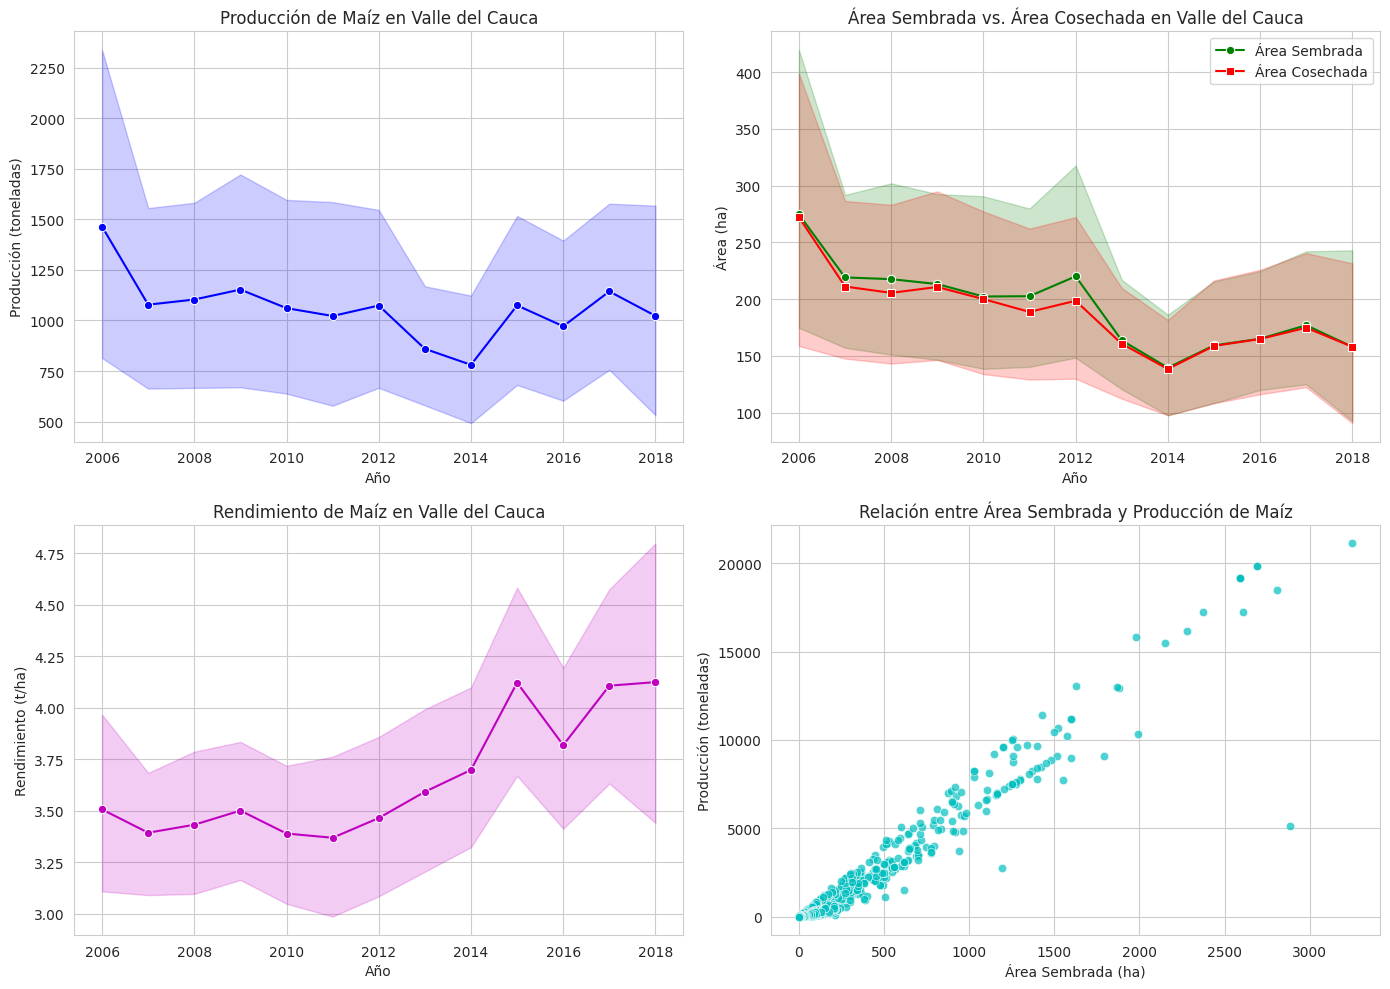

In [ ]:

# Filtrar solo datos del Valle del Cauca y del cultivo de Maíz
df_valle = df[(df["Departamento"] == "VALLE DEL CAUCA") & (df["Cultivo"] == "MAIZ")]

# Configuración de estilo
sns.set_style("whitegrid")

# Crear una figura con 2 filas y 2 columnas
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1Producción de maíz vs. Año
sns.lineplot(data=df_valle, x="Año", y="Produccion_t", marker="o", color="b", ax=axes[0, 0])
axes[0, 0].set_title("Producción de Maíz en Valle del Cauca")
axes[0, 0].set_xlabel("Año")
axes[0, 0].set_ylabel("Producción (toneladas)")

# 2️Área sembrada vs. Área cosechada en el tiempo
sns.lineplot(data=df_valle, x="Año", y="Area_Sembrada_ha", marker="o", label="Área Sembrada", color="g", ax=axes[0, 1])
sns.lineplot(data=df_valle, x="Año", y="Area_Cosechada_ha", marker="s", label="Área Cosechada", color="r", ax=axes[0, 1])
axes[0, 1].set_title("Área Sembrada vs. Área Cosechada en Valle del Cauca")
axes[0, 1].set_xlabel("Año")
axes[0, 1].set_ylabel("Área (ha)")
axes[0, 1].legend()

# 3️ Rendimiento de Maíz vs. Año
sns.lineplot(data=df_valle, x="Año", y="Rendimiento_t_ha", marker="o", color="m", ax=axes[1, 0])
axes[1, 0].set_title("Rendimiento de Maíz en Valle del Cauca")
axes[1, 0].set_xlabel("Año")
axes[1, 0].set_ylabel("Rendimiento (t/ha)")

# 4️ Dispersión entre Área Sembrada y Producción
sns.scatterplot(data=df_valle, x="Area_Sembrada_ha", y="Produccion_t", alpha=0.7, color="c", ax=axes[1, 1])
axes[1, 1].set_title("Relación entre Área Sembrada y Producción de Maíz")
axes[1, 1].set_xlabel("Área Sembrada (ha)")
axes[1, 1].set_ylabel("Producción (toneladas)")

# Ajustar diseño para evitar superposición
plt.tight_layout()
plt.show()
